# 정규표현식
- 나만의 일정한 규칙을 만들 수 있다.
- 복잡한 문자열 속에서 내가 원하는 문자만 추출하거나, 내가 원하는 패턴만 추출 할 수 있다.
- 정규식 패턴을 이용하여 전처리, 추출 가능

In [24]:
import re # 정규표현식 패키지

## re.match(패턴, 뒤가 문자열), search
- match는 주어진 str의 시작부분부터 pattern 비교 시작
- search는 주어진 str 전체에서 regex과 맞는 pattern 찾아낸다

In [25]:
re.match('Hello','Hello, world!')

<re.Match object; span=(0, 5), match='Hello'>

In [26]:
re.match("ab",'ab, Hello, world!')

<re.Match object; span=(0, 2), match='ab'>

In [27]:
re.match('Hello', 'ab Hello') # 찾지 못한다

In [28]:
re.search('Hello', 'ab Hello') #찾는다.

<re.Match object; span=(3, 8), match='Hello'>

- 숫자패턴 : [0-9], 전체 모든 숫자를 의미
- 모든 숫자 : [0-9]* , [0-9]+

In [29]:
# 숫자 데이터만 찾고 싶다
re.search('[0-9]*','12345, hihihi')

<re.Match object; span=(0, 5), match='12345'>

In [30]:
re.search('[0-9]+','12345, hihihi')

<re.Match object; span=(0, 5), match='12345'>

- 문자{개수}
- (문자열){개수}

In [31]:
re.match('a{5}','aaaaaa10')

<re.Match object; span=(0, 5), match='aaaaa'>

In [32]:
re.match('(hi){5}','hihihihihi1234')

<re.Match object; span=(0, 10), match='hihihihihi'>

- 전화번호 패턴
  - 모든숫자(3개) -모든숫자(4개) - 모든숫자(4개)

In [33]:
re.match('[0-9]{3}-[0-9]{4}-[0-9]{4}','010-1234-5678')

<re.Match object; span=(0, 13), match='010-1234-5678'>

- 문자(알파벳)
  - a-z : 모든 알파벳 소문자
  - A-Z : 모든 알파벳 대문자
  - A-z : 모든 알파벳

In [34]:
# 알파벳이거나 숫자가 0번 이상인 문자열 추출
re.match('[a-zA-Z0-9]*','hihiHI1234')

<re.Match object; span=(0, 10), match='hihiHI1234'>

- 문자 (한국어)
  - 가-힣 : 모든 한글
  - ㄱ-ㅎ : 자음
  - ㅏ-ㅣ : 모음
- 따로 사용 가능

In [35]:
re.search('[가-힣]+','www.python.org/안녕하세요?')

<re.Match object; span=(15, 20), match='안녕하세요'>

- 특수문자의 경우 앞에 \를 붙이면 된다.

In [36]:
# 특수문자 물음표가 1번 이상인 문자열 추출
re.search('\?+', '?안녕!')

<re.Match object; span=(0, 1), match='?'>

- 여러가지 표현
- \d 모든 숫자
- \D 모든 숫자를 제외한다
- not [^0-9] 모든 문자를 제외한 것

- \w [a-zA-Z0-9_] 영문, 대소문자, 숫자, 밑줄 문자
- \W [^a-zA-Z0-9_] 위에 \w제외한 나머지 다

In [37]:
re.match('\d+','12345')

<re.Match object; span=(0, 5), match='12345'>

In [38]:
re.match('\w+','12345abcd')

<re.Match object; span=(0, 9), match='12345abcd'>

- 공백 처리하기 : \s 또는 \S

In [39]:
re.match('[a-zA-Z0-9\s]+', 'hi 12345')

<re.Match object; span=(0, 8), match='hi 12345'>

# 그룹 사용하기
- (정규표현식)(정규표현식)

In [40]:
ab = re.match('([0-9]+) ([a-z]+)','1234 abc')
ab.group(1)

'1234'

In [41]:
ab.group(2)

'abc'

In [42]:
ab.group(0)

'1234 abc'

##  이메일 찾기 정규표현식
- 1. 영어소문자,숫자만 가능
- 2. 대문자는 불가능하다.
- 3. 문자열로 시작해야 한다.
- 4. @기업명.com 으로 끝난다.
- 5. 기업명에는 문자열만 들어간다.


In [43]:
re.match('[a-z0-9]*@[a-z]*.[a-z]{3}','python@gmail.com')

<re.Match object; span=(0, 16), match='python@gmail.com'>

In [44]:
re.search('[a-z]*[0-9]*@[a-z]*.com','python@gmai.com')

<re.Match object; span=(0, 15), match='python@gmai.com'>

# 텍스트 분석

In [45]:
import pandas as pd
survey = pd.read_csv('survey_설문지.csv')
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [46]:
# 정규식을 가지고 영어는 제외하고 한글만 모두 다 남기자!
survey['comment'] = survey['comment'].str.replace('[A-Za-z]',"", regex=True)  #regex
survey['comment']

0              역앞에 젊은이들이 모여있다(역)
1          운동할 수 있는 장소가 있는 것이 좋다
2                      육아 지원이 좋다
3     어린이집에 바로 입원할 수 있다(대기아동 없음)
4                    역앞 상가가 쓸쓸하다
                 ...            
81        초등학교 운동장이 잔디밭이라서 아주 좋다
82    홈페이지에서도 설문지를 투고할 수 있게 해 달라
83               공원에 놀이기구가 너무 적다
84                공원을 더 늘렸으면 좋겠다
85             역앞에 주차장이 적다, 불편하다
Name: comment, Length: 86, dtype: object

In [47]:
survey['len'] = survey['comment'].str.len() # 전체 리뷰에 대한 길이를 만들 수 있다.

(array([19., 19., 20., 11.,  7.,  3.,  4.,  0.,  0.,  1.]),
 array([ 6. , 11.6, 17.2, 22.8, 28.4, 34. , 39.6, 45.2, 50.8, 56.4, 62. ]),
 <BarContainer object of 10 artists>)

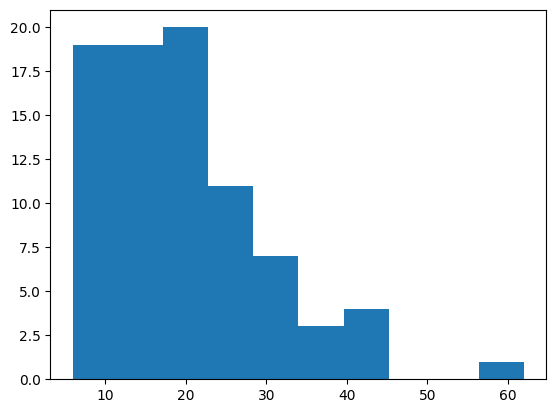

In [48]:
import matplotlib.pyplot as plt
plt.hist(survey['len'])